# Аудиториска вежба 1

In [1]:
import numpy as np
import pandas as pd
from nltk.tokenize import word_tokenize, TweetTokenizer, WhitespaceTokenizer, RegexpTokenizer
from gensim.models import Word2Vec
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [2]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## Зборовни вектори

In [3]:
data = pd.read_csv('train_en.txt', sep='\t')

In [4]:
data

,Sentence,Style
0,he had steel balls too !,toxic
1,"dude should have been taken to api , he would ...",toxic
2,"im not gonna sell the fucking picture , i just...",toxic
3,the garbage that is being created by cnn and o...,toxic
4,the reason they dont exist is because neither ...,toxic
...,...,...
25035,both sides need to calm down or we are heading...,neutral
25036,i 'm sitting here in my calm german city conte...,neutral
25037,"dude , get a clue .",neutral
25038,"I was so high, it was amazing.",neutral


In [5]:
data['Tokens'] = data['Sentence'].apply(lambda x: word_tokenize(x.lower()))

In [6]:
data

,Sentence,Style,Tokens
0,he had steel balls too !,toxic,"[he, had, steel, balls, too, !]"
1,"dude should have been taken to api , he would ...",toxic,"[dude, should, have, been, taken, to, api, ,, ..."
2,"im not gonna sell the fucking picture , i just...",toxic,"[im, not, gon, na, sell, the, fucking, picture..."
3,the garbage that is being created by cnn and o...,toxic,"[the, garbage, that, is, being, created, by, c..."
4,the reason they dont exist is because neither ...,toxic,"[the, reason, they, dont, exist, is, because, ..."
...,...,...,...
25035,both sides need to calm down or we are heading...,neutral,"[both, sides, need, to, calm, down, or, we, ar..."
25036,i 'm sitting here in my calm german city conte...,neutral,"[i, 'm, sitting, here, in, my, calm, german, c..."
25037,"dude , get a clue .",neutral,"[dude, ,, get, a, clue, .]"
25038,"I was so high, it was amazing.",neutral,"[i, was, so, high, ,, it, was, amazing, .]"


In [7]:
sentences = data['Tokens'].values

In [34]:
# model_word2vec = Word2Vec(sentences, vector_size=50, min_count=25, sg=1)
model_word2vec = Word2Vec(sentences, vector_size=50, min_count=1, sg=1)

In [14]:
len(model_word2vec.wv.index_to_key)

976

In [36]:
words = model_word2vec.wv.index_to_key

In [ ]:
words.append('<UNK>')

In [35]:
word_embeddings = model_word2vec.wv.vectors

In [19]:
len(word_embeddings[0])

50

In [20]:
tsne = TSNE(n_components=2, random_state=0)

In [25]:
word_embeddings_2d = tsne.fit_transform(word_embeddings[:50])

In [22]:
len(word_embeddings_2d[0])

2

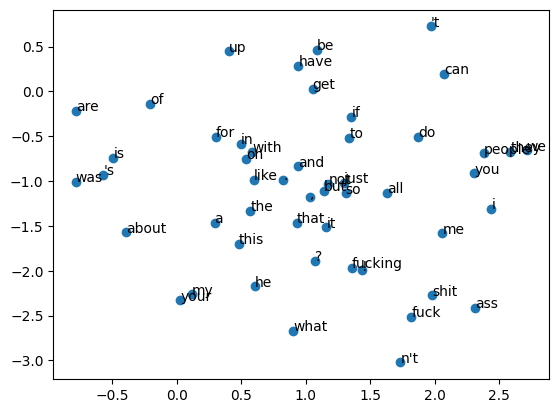

In [26]:
plt.scatter(word_embeddings_2d[:, 0], word_embeddings_2d[:, 1])
for label, x, y in zip(words[:50], word_embeddings_2d[:, 0], word_embeddings_2d[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
plt.show()

## Рекурентни невронски мрежи за класификација на текст

In [37]:
word_to_id = {word: i for i, word in enumerate(words)}

In [39]:
len(word_to_id)

11732

In [40]:
data['IDs'] = data['Tokens'].apply(lambda x: [word_to_id[word] for word in x])

In [41]:
data

,Sentence,Style,Tokens,IDs
0,he had steel balls too !,toxic,"[he, had, steel, balls, too, !]","[35, 147, 9173, 1280, 92, 12]"
1,"dude should have been taken to api , he would ...",toxic,"[dude, should, have, been, taken, to, api, ,, ...","[294, 102, 37, 128, 1200, 5, 7070, 3, 35, 60, ..."
2,"im not gonna sell the fucking picture , i just...",toxic,"[im, not, gon, na, sell, the, fucking, picture...","[116, 21, 175, 134, 1633, 1, 23, 1058, 3, 2, 3..."
3,the garbage that is being created by cnn and o...,toxic,"[the, garbage, that, is, being, created, by, c...","[1, 520, 8, 7, 121, 1473, 109, 1000, 11, 155, ..."
4,the reason they dont exist is because neither ...,toxic,"[the, reason, they, dont, exist, is, because, ...","[1, 389, 24, 120, 1195, 7, 81, 1121, 7, 6, 361..."
...,...,...,...,...
25035,both sides need to calm down or we are heading...,neutral,"[both, sides, need, to, calm, down, or, we, ar...","[274, 863, 108, 5, 956, 150, 77, 42, 17, 3336,..."
25036,i 'm sitting here in my calm german city conte...,neutral,"[i, 'm, sitting, here, in, my, calm, german, c...","[2, 50, 965, 100, 16, 25, 956, 1164, 542, 3157..."
25037,"dude , get a clue .",neutral,"[dude, ,, get, a, clue, .]","[294, 3, 41, 6, 644, 0]"
25038,"I was so high, it was amazing.",neutral,"[i, was, so, high, ,, it, was, amazing, .]","[2, 34, 39, 450, 3, 13, 34, 327, 0]"


In [42]:
token_ids = data['IDs'].values

In [43]:
token_ids

array([list([35, 147, 9173, 1280, 92, 12]),
       list([294, 102, 37, 128, 1200, 5, 7070, 3, 35, 60, 29, 86, 62, 323, 33, 45, 1, 155, 9255, 72]),
       list([116, 21, 175, 134, 1633, 1, 23, 1058, 3, 2, 31, 98, 5, 2702, 5, 1, 23, 202, 0]),
       ..., list([294, 3, 41, 6, 644, 0]),
       list([2, 34, 39, 450, 3, 13, 34, 327, 0]),
       list([320, 40, 1547, 0])], dtype=object)

In [44]:
padded_ids = pad_sequences(token_ids, 15)

In [45]:
padded_ids

array([[   0,    0,    0, ..., 1280,   92,   12],
       [   5, 7070,    3, ...,  155, 9255,   72],
       [1633,    1,   23, ...,   23,  202,    0],
       ...,
       [   0,    0,    0, ...,    6,  644,    0],
       [   0,    0,    0, ...,   34,  327,    0],
       [   0,    0,    0, ...,   40, 1547,    0]], dtype=int32)

In [47]:
labels = data['Style'].values

In [48]:
labels

array(['toxic', 'toxic', 'toxic', ..., 'neutral', 'neutral', 'neutral'],
      dtype=object)

In [27]:
model = Sequential()

In [ ]:
model.add(Embedding(input_dim=len(words), output_dim=50,
                    weights=[word_embeddings], trainable=True))

In [ ]:
model.add(LSTM(64, return_sequences=True))

In [ ]:
model.add(LSTM(32))

In [ ]:
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile()

In [ ]:
model.fit(padded_ids, labels_transformed)